# Лабораторная работа №7

### Выполнил Рыбаков Владислав, БПМ201, 29 вариант

Задания 7.1.29, 7.3.10, 7.5.5

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Задание 7.1.29

Найти приближенное решение задачи Коши для обыкновенного дифференциального уравнения (ОДУ) 1 порядка

\begin{equation*}
 \begin{cases}
   y'(t) = 3t^2y + t^2(1+t^3)/3, t \in [0, 1],
   \\
   y(t_0) = 0
 \end{cases}
\end{equation*}
и оценить погрешность решения задачи.

In [281]:
h = 0.1
N = 10
t0 = 0
T = 1
y0 = 0

In [298]:
def f(t, y):
    return 3*t*t*y + t*t*(1+t**3)/3

# метод эйлера
def eyler(f, y0, t0, h, N):
    y = y0
    y_all = np.zeros(N, dtype=float)
    y_all[0] = y
    for i in range(N):
        y = y + h * f(t0 + i*h, y)
        y_all[i] = y
    return y_all

In [299]:
y_ey = eyler(f, y0, t0, h, N)
y_ey

array([0.        , 0.00033367, 0.00168167, 0.00480808, 0.01071353,
       0.02089204, 0.03774039, 0.06522389, 0.11000288, 0.18341657])

In [300]:
# метод рунге-кутты 4-го порядка
def runge_kutta_4(f, y0, t0, T, h, N):
    y = y0
    y_all = np.zeros(N, dtype=float)
    y_all[0] = y
    for i in range(N):
        k1 = f(t0 + i*h, y)
        k2 = f(t0 + i*h + h/2, y + h*k1/2)
        k3 = f(t0 + i*h + h/2, y + h*k2/2)
        k4 = f(t0 + i*h + h, y + h*k3)
        y = y + h * (k1 + 2*k2 + 2*k3 + k4)/6
        y_all[i] = y
    return y_all

In [301]:
y_rk = runge_kutta_4(f, y0, t0, T, h, N)
y_rk

array([1.11225717e-04, 8.96039025e-04, 3.08177958e-03, 7.57615850e-03,
       1.56997288e-02, 2.95783212e-02, 5.28150833e-02, 9.16936115e-02,
       1.57442890e-01, 2.70718838e-01])

Найдем решение аналитически:
$$y_{oo} = C e^{\int t^2 dt} = C e^{t^3}$$

$$y_{oo} = C(t) e^{t^3} $$

$$y_{oo}' = C'(t) e^{t^3} + 3t^2 C(t)e^{t^3}$$

Подставим в исходное уравнение:

$$ C'(t) e^{t^3} + 3t^2 C(t)e^{t^3} = 3t^2 C(t)e^{t^3} + \frac{t^2}{3} + \frac{t^5}{3}$$

$$ C'(t) e^{t^3} = \frac{t^5}{3} + \frac{t^2}{3}$$

$$ C(t) = -\frac{1}{9} e^{-t^3} (t^3 + 2) + C_1 $$

$$ y = e^{t^3} \left(-\frac{1}{9} e^{-t^3} (t^3 + 2) + C_1 \right) $$

Учтем начальное условие $y(0) = 0$:

$$ e^0 (-e^0 \frac{2}{9} + C_1) = 0 => C_1=\frac{2}{9} $$

$$ y = \frac{1}{9} (2 e^{t^3} - t^3 - 2) $$

In [302]:
# точное решение
def analitic(t):
    return (2*np.e**(t**3) - t**3 - 2)/9

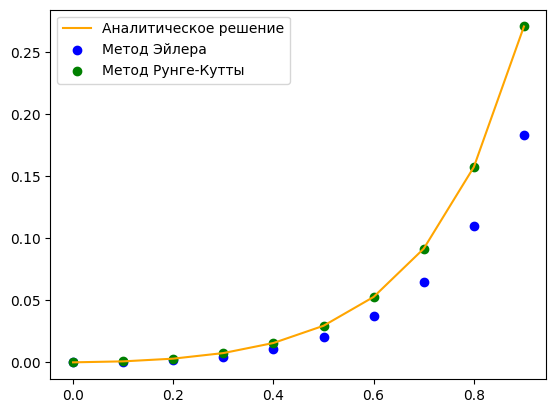

In [303]:
# построим чертеж
x_an = np.arange(0, 1, 0.1)
x = np.arange(0, 1, 0.1)
y_an = [analitic(i+0.1) for i in x]

plt.plot(x_an, y_an, color="orange", label="Аналитическое решение")
plt.scatter(x, y_ey, color="blue", label="Метод Эйлера")
plt.scatter(x, y_rk, color="green", label="Метод Рунге-Кутты")
plt.legend()
plt.show()

In [304]:
# значения приближенных и точного решений
print('Аналитическое решение', 'Метод Эйлера', 'Метод Рунге-Кутты', sep='\t')
for i in range(N):
    print(y_an[i], y_ey[i], y_rk[i], sep='\t')

Аналитическое решение	Метод Эйлера	Метод Рунге-Кутты
0.00011122225926854214	0.0	0.00011122571658181424
0.0008960190009496611	0.00033366666666666674	0.0008960390248396608
0.0030817339474420694	0.001681670666666667	0.0030817795759600294
0.0075760886136678135	0.004808075774666668	0.007576158496055356
0.015699656237072517	0.010713530078517336	0.015699728787300395
0.029578306444593732	0.020892044834406136	0.029578321190685375
0.05281528042810023	0.037740385676522006	0.052815083344555994
0.091694468919926	0.06522388903763741	0.09169361151639772
0.15744590316910934	0.11000287573286381	0.1574428900665958
0.2707292952131211	0.18341657453594973	0.27071883811927927


In [305]:
# погрешности
eps_ey = np.max(np.abs(y_an - y_ey))
eps_rk = np.max(np.abs(y_an - y_rk))
print("Погрешность метода Эйлера:", eps_ey)
print("Погрешность метода Рунге-Кутты:", eps_rk)

Погрешность метода Эйлера: 0.08731272067717138
Погрешность метода Рунге-Кутты: 1.0457093841842457e-05


In [306]:
h2 = h/2
N2 = int((T-t0)/h2)

In [307]:
y_ey_h2 = eyler(f, y0, t0, h2, N2)
y_rk_h2 = runge_kutta_4(f, y0, t0, T, h2, N2)

In [313]:
z_ey = np.max(np.abs(y_ey - y_ey_h2[::2]))
z_rk = np.max(np.abs(y_rk - y_rk_h2[::2])/15)

In [314]:
print("Погрешность метода Эйлера по правилу Рунге:", z_ey)
print("Погрешность метода Рунге-Кутты по правилу Рунге:", z_rk)

Погрешность метода Эйлера по правилу Рунге: 0.013014053166262751
Погрешность метода Рунге-Кутты по правилу Рунге: 0.004295679070186353


In [316]:
h_new = h2
N_new = N2
y_new = eyler(f, y0, t0, h_new, N_new)
i = 2
eps = np.max(np.abs(y_an - y_new[::i]))
print(N_new, eps)
while eps > eps_rk:
    h_new = h_new/2
    N_new = N_new*2
    y_new = eyler(f, y0, t0, h_new, N_new)
    i *= 2
    eps = np.max(np.abs(y_an - y_new[::i]))
    print(N_new, eps)
    
print(h_new)

20 0.10032677384343414
40 0.10680935645496953
80 0.11004707676332831
160 0.11166536447937708
320 0.11247440511217399
640 0.1128789045842786
1280 0.11308114972753738
2560 0.11318227122811333
5120 0.11323283172027168
10240 0.11325811190302165
20480 0.11327075197871492
40960 0.11327707201266132
81920 0.11328023202865992
163840 0.1132818120364179
327680 0.11328260204023657
655360 0.11328299704212644
1310720 0.11328319454307265
2621440 0.11328329329353959


KeyboardInterrupt: 

### Задание 7.3.10

Решить приближенно задачу Коши для ОДУ 1 порядка вида (1), используя метод Рунге-Кутты 4
порядка точности и метод Рунге-Кутты 3 порядка III с шагами $h$ и $h/2$ . Для каждого метода оценить
погрешность по правилу Рунге и вычислить уточненное решение (см. ПРИЛОЖЕНИЕ 7.C). Построить на
одном чертеже графики приближенных решений (с шагом $h / 2$) и графики уточненных решений.

\begin{equation*}
 \begin{cases}
   y'(t) = y \tan{t} - \frac{2}{3} y^4 \sin{t}, t \in [0,1],
   \\
   y(t_0) = 1
 \end{cases}
\end{equation*}

In [263]:
def f_73(t, y):
    return y*np.tan(t) - 2/3 * y**4 *np.sin(t)

In [264]:
h = 0.1
N = 10
y0 = 1
t0 = 0
T = 1

h2 = 0.05
N2 = 20

In [265]:
x = np.arange(0, 1, 0.1)

y_rk4_h = runge_kutta_4(f_73, y0, t0, T, h, N)
y_rk4_h2 = runge_kutta_4(f_73, y0, t0, T, h2, N2)

In [266]:
# метод Рунге-Кутты 3 порядка III
def runge_kutta_3(f, y0, t0, T, h, N):
    y = y0
    y_all = np.zeros(N, dtype=float)
    y_all[0] = y
    for i in range(N):
        k1 = h*f(t0 + i*h, y)
        k2 = h*f(t0 + i*h + h/2, y + k1/2)
        k3 = h*f(t0 + i*h + 3*h/4, y + 3*k2/4)
        y = y + (2*k1 + 3*k2 + 4*k3)/9
        y_all[i] = y
    return y_all

In [267]:
y_rk3_h = runge_kutta_3(f_73, y0, t0, T, h, N)
y_rk3_h2 = runge_kutta_3(f_73, y0, t0, T, h2, N2)

In [268]:
# погрешности
eps_rk4 = np.abs(y_rk4_h2[::2] - y_rk4_h)/15
eps_rk3 = np.abs(y_rk3_h2[::2] - y_rk3_h)/7
print("Погрешность метода Рунге_Кутты 4:", np.max(eps_rk4))
print("Погрешность метода Рунге-Кутты 3:", np.max(eps_rk3))

Погрешность метода Рунге_Кутты 4: 0.001989547010976326
Погрешность метода Рунге-Кутты 3: 0.00425007808857214


In [269]:
# уточненные решения

y_ut_4 = y_rk4_h2[::2] + eps_rk4
y_ut_3 = y_rk3_h2[::2] + eps_rk3

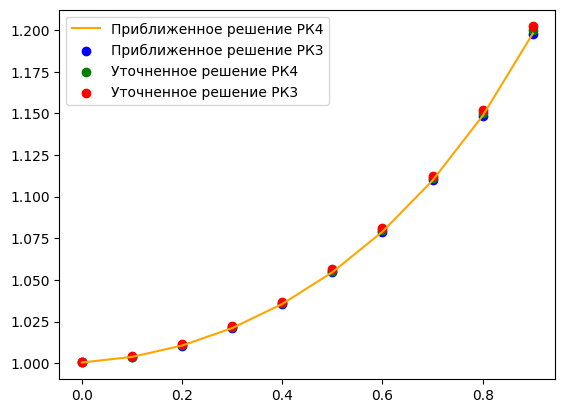

In [270]:
plt.plot(x, y_rk4_h2[::2], color="orange", label="Приближенное решение РК4")
plt.scatter(x, y_rk3_h2[::2], color="blue", label="Приближенное решение РК3")
plt.scatter(x, y_ut_4, color="green", label="Уточненное решение РК4")
plt.scatter(x, y_ut_3, color="red", label="Уточненное решение РК3")
plt.legend()
plt.show()

### Задание 7.5.5

Дана жесткая задача Коши вида (1). Найти решение задачи с заданной точностью $ \varepsilon = 10^{-3}$

\begin{equation*}
 \begin{cases}
   y'(t) = -30y + \sin (2t) + 30 \sin^2(t), t \in [0, 1.5],
   \\
   y(t_0) = 1
 \end{cases}
\end{equation*}

In [271]:
h = 0.15
N = 10
eps = 0.001
t0 = 0
T = 1.5
y0 = 1

def f_75(t, y):
    return -30*y + np.sin(2*t) + 30*np.sin(t)**2

In [272]:
y_ey = eyler(f_75, y0, t0, h, N)
y_ey

array([ 1.00000000e+00, -3.35517907e+00,  1.22208180e+01, -4.18039863e+01,
        1.47888453e+02, -5.15369120e+02,  1.80669920e+03, -6.31993182e+03,
        2.21237718e+04, -7.74288532e+04])

In [273]:
y_rk = runge_kutta_4(f_75, y0, t0, T, h, N)
y_rk

array([8.58830167e+00, 7.31385654e+01, 6.22870182e+02, 5.30772533e+03,
       4.52378248e+04, 3.85578426e+05, 3.28644912e+06, 2.80118381e+07,
       2.38757145e+08, 2.03503160e+09])

In [274]:
x = np.arange(0, 1.5, 0.15)

# точное решение
y_toch = np.sin(x)**2 + np.e**(-30 * x)
y_toch

array([1.        , 0.03344075, 0.0874556 , 0.18919639, 0.31882114,
       0.4646314 , 0.61360105, 0.75242305, 0.86869686, 0.95203607])

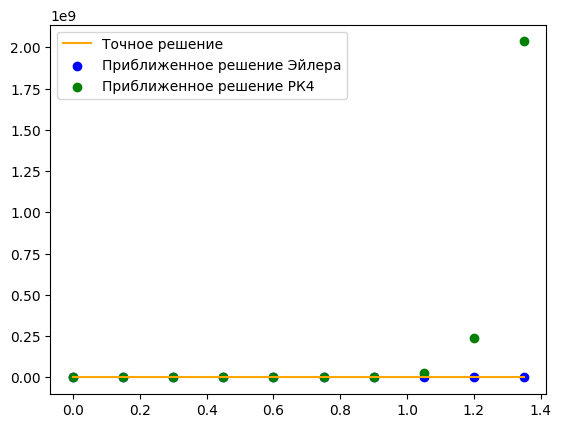

In [275]:
plt.plot(x, y_toch, color="orange", label="Точное решение")
plt.scatter(x, y_ey, color="blue", label="Приближенное решение Эйлера")
plt.scatter(x, y_rk, color="green", label="Приближенное решение РК4")
plt.legend()
plt.show()

**Поскольку задача жесктая и наши методы явные и не являются A-устойчивыми, то получается неправильное решение, нужно брать меньше шаг h**

In [276]:
# решение задачи методом эйлера с заданной точностью
h_new = h/2
N_new = N*2
y_new = eyler(f_75, y0, t0, h_new, N_new)
i = 2
eps_new = np.max(np.abs(y_toch - y_new[::i]))
while eps_new > eps:
    h_new = h_new/2
    N_new = N_new*2
    y_new = eyler(f_75, y0, t0, h_new, N_new)
    i *= 2
    eps_new = np.max(np.abs(y_toch - y_new[::i]))
    
print(h_new, N_new)

y_ey_new = np.copy(y_new)

0.0005859375 2560


In [277]:
# решение задачи методом рунге-кутты с заданной точностью
h_new = h/2
N_new = N*2
y_new = runge_kutta_4(f_75, y0, t0, T, h_new, N_new)
i = 2
eps_new = np.max(np.abs(y_toch - y_new[::i]))
while eps_new > eps:
    h_new = h_new/2
    N_new = N_new*2
    y_new = runge_kutta_4(f_75, y0, t0, T, h_new, N_new)
    i *= 2
    eps_new = np.max(np.abs(y_toch - y_new[::i]))
    
print(h_new, N_new)

y_rk_new = np.copy(y_new)

1.8310546875e-05 81920


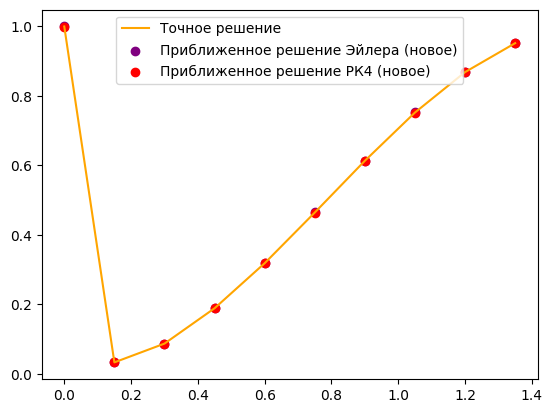

In [280]:
plt.plot(x, y_toch, color="orange", label="Точное решение")
#plt.scatter(x, y_ey, color="blue", label="Приближенное решение Эйлера")
#plt.scatter(x, y_rk, color="green", label="Приближенное решение РК4")
plt.scatter(x, y_ey_new[::256], color="purple", label="Приближенное решение Эйлера (новое)")
plt.scatter(x, y_rk_new[::8192], color="red", label="Приближенное решение РК4 (новое)")
plt.legend()
plt.show()

**Получили правильное решение с заданной точностью. Причем метод Эйлера потребовал разбиение отрезка на меньшее число подотрезков, чем метод Рунге-Кутты.**
